# Proyek Klasifikasi Gambar: Animal-Faces
- **Nama:** Muhammad Rizky
- **Email:** muhammadrizky102356@gmail.com
- **ID Dicoding:** muhammadrizky1023

## Import Semua Packages/Library yang Digunakan

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from google.colab import drive
import tensorflow as tf
!pip install tensorflowjs
import tensorflowjs as tfjs
import os, zipfile
from sklearn.model_selection import train_test_split
import shutil
import random
import zipfile
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.image as mpimg
import pathlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
pip freeze > requirements.txt

## Data Preparation

### Data Loading

In [ ]:
drive.mount('/content/drive', force_remount=True)
zip_file = '/content/drive/MyDrive/dataset/animal-faces-.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

Mounted at /content/drive


### Data Preprocessing

#### Split Dataset

In [ ]:
dataset_dir = '/content/afhq'
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'val')
os.listdir(dataset_dir)

['train', 'val']

In [ ]:
os.listdir(train_dir)

['cat', 'dog', 'wild']

In [ ]:
os.listdir(test_dir)

['cat', 'dog', 'wild']

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 14630 images belonging to 3 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1500 images belonging to 3 classes.


## Modelling

In [ ]:
inpuut_shape = (150, 150, 3)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=inpuut_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
class Accurate(tf.keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.92 and  logs.get('val_accuracy') > 0.92:
            print("\nAkurasi train dan validasi telah mencapai nilai > 92%!")
            self.model.stop_training = True

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    callbacks=[Accurate()]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


457/457 ━━━━━━━━━━━━━━━━━━━━ 1009s 2s/step - accuracy: 0.5244 - loss: 0.9666 - val_accuracy: 0.8139 - val_loss: 0.4812
Epoch 2/20
  1/457 ━━━━━━━━━━━━━━━━━━━━ 12:32 2s/step - accuracy: 0.7500 - loss: 0.6630

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.7500 - loss: 0.6630 - val_accuracy: 0.8571 - val_loss: 0.4936
Epoch 3/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 1032s 2s/step - accuracy: 0.8095 - loss: 0.4781 - val_accuracy: 0.8030 - val_loss: 0.5991
Epoch 4/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.8125 - loss: 0.4498 - val_accuracy: 0.7143 - val_loss: 1.0704
Epoch 5/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 1008s 2s/step - accuracy: 0.8676 - loss: 0.3437 - val_accuracy: 0.9314 - val_loss: 0.2064
Epoch 6/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.7500 - loss: 0.4356 - val_accuracy: 0.9286 - val_loss: 0.2794
Epoch 7/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 995s 2s/step - accuracy: 0.8859 - loss: 0.2910 - val_accuracy: 0.9457 - val_loss: 0.1662
Epoch 8/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.8125 - loss: 0.4387 - val_accuracy: 0.8929 - val_loss: 0.1865
Epoch 9/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 994s 2s/step - accuracy: 0.9079 - loss: 0.2447 - val_accuracy:

## Evaluasi dan Visualisasi


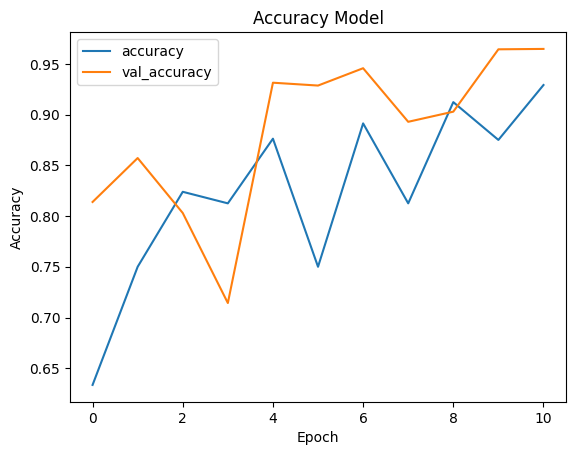

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Model')
plt.legend()
plt.show()

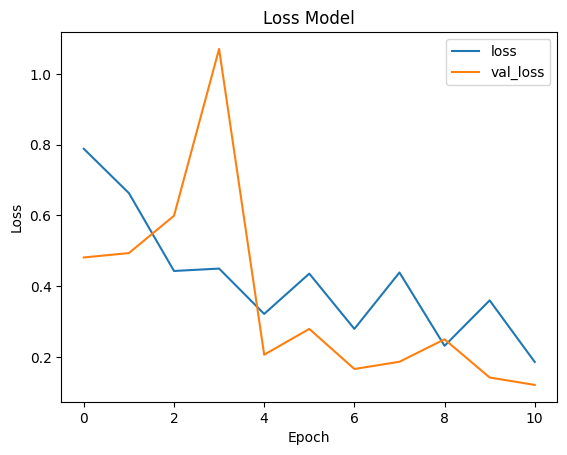

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Model')
plt.legend()
plt.show()

##Image Prediction with File Upload


Saving flickr_wild_000002.jpg to flickr_wild_000002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
File: flickr_wild_000002.jpg
Predicted label: wild


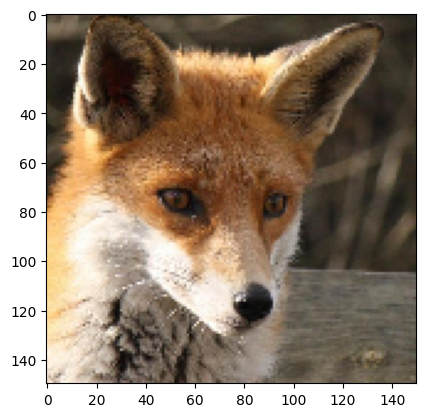

In [ ]:
uploaded = files.upload()

for temp in uploaded.keys():
    path = temp

    # Load image and preprocess it
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)

    # Convert image to array and preprocess it
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalisasi gambar seperti yang dilakukan pada data pelatihan

    # Predict the image class
    predicted = model.predict(x, batch_size=10)

    # Get the predicted class index
    predicted_class_index = np.argmax(predicted, axis=1)[0]

    # Mapping predicted index to class labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index]

    # Print the results
    print(f"File: {temp}")
    print(f"Predicted label: {predicted_class_label}")


## Random Predict Image Processing

In [ ]:
def preprocess_image_load(img_array, target_size=(150, 150)):
    img_array = tf.image.resize(img_array, target_size)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
validation_batch = next(iter(validation_generator))
images, labels = validation_batch
num_images = images.shape[0]
random_index = random.randint(0, num_images - 1)
image_array = images[random_index]
true_label_index = np.argmax(labels[random_index])
image_array_processed = preprocess_image_load(image_array)


In [ ]:

probality_predict = model.predict(image_array_processed)
index_predicted = np.argmax(probality_predict, axis=1)[0]
index_predicted = true_label_index
predicted_label = list(train_generator.class_indices.keys())[index_predicted]
label_true = list(train_generator.class_indices.keys())[true_label_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


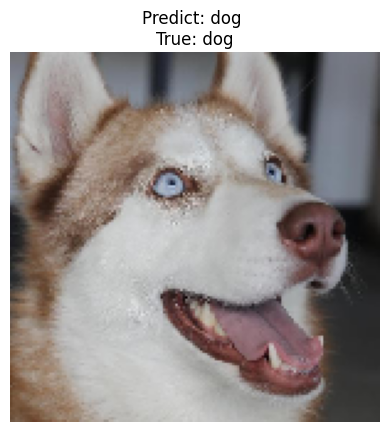

In [ ]:
# Menampilkan gambar
plt.imshow(images[random_index])
plt.axis('off')

# Menambahkan label pada plot dengan prediksi dan keyakinan
plt.title(f"Predict: {predicted_label} \nTrue: {label_true}")

plt.show()

## Konversi Model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
output_tflite_dir = 'tflite'
tflite_model_path = os.path.join(output_tflite_dir, 'model.tflite')
os.makedirs(output_tflite_dir, exist_ok=True)
with tf.io.gfile.GFile(tflite_model_path, 'wb') as f:
    f.write(tflite_model)
labels = list(train_generator.class_indices.keys())
labels_path = os.path.join(output_tflite_dir, 'labels.txt')
with tf.io.gfile.GFile(labels_path, 'w') as f:
    f.write('\n'.join(labels))
shutil.make_archive(output_tflite_dir, 'zip', output_tflite_dir)
files.download(f'{output_tflite_dir}.zip')

Saved artifact at '/tmp/tmpkg6d5j5o'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132152263167488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132152263169952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132152263163968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132152263173472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132152263172768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132152263175232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132152263174352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132152263176992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132152263164144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132152263178576: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output_tfjs_dir = 'tfjs'
tfjs_model_path = os.path.join(output_tfjs_dir, 'model')
os.makedirs(output_tfjs_dir, exist_ok=True)
tfjs.converters.save_keras_model(model, tfjs_model_path)
shutil.make_archive(output_tfjs_dir, 'zip', output_tfjs_dir)
files.download(f'{output_tfjs_dir}.zip')

failed to lookup keras version from the file,
    this is likely a weight only file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output_saved_model_dir = 'saved_model'
saved_model_path = os.path.join(output_saved_model_dir, 'model')
os.makedirs(output_saved_model_dir, exist_ok=True)
tf.saved_model.save(model, saved_model_path)
shutil.make_archive(output_saved_model_dir, 'zip', output_saved_model_dir)
files.download(f'{output_saved_model_dir}.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls  -la | grep 'model'

drwxr-xr-x 3 root root      4096 Aug 24 15:45 saved_model
-rw-r--r-- 1 root root 196555428 Aug 24 15:45 saved_model.zip
